How's it look?

Now with **Mixture model**!

We have orders m111, m113, m114, m115 complete.  Let's plot all of the results on the same figure.

In [2]:
#ws = np.load("../sf/m115/output/mix_emcee/run_veil/emcee_chain.npy")
ws = np.load("../sf/m090/output/mix_emcee/run01/emcee_chain.npy")

In [3]:
#label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
#         "$f_{d}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"] 

In [4]:
ws.shape

(40, 5000, 14)

In [5]:
from matplotlib.ticker import MaxNLocator

In [6]:
label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
         "$T_{\mathrm{eff, 2}}$", "$\log{\Omega_2}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"] 

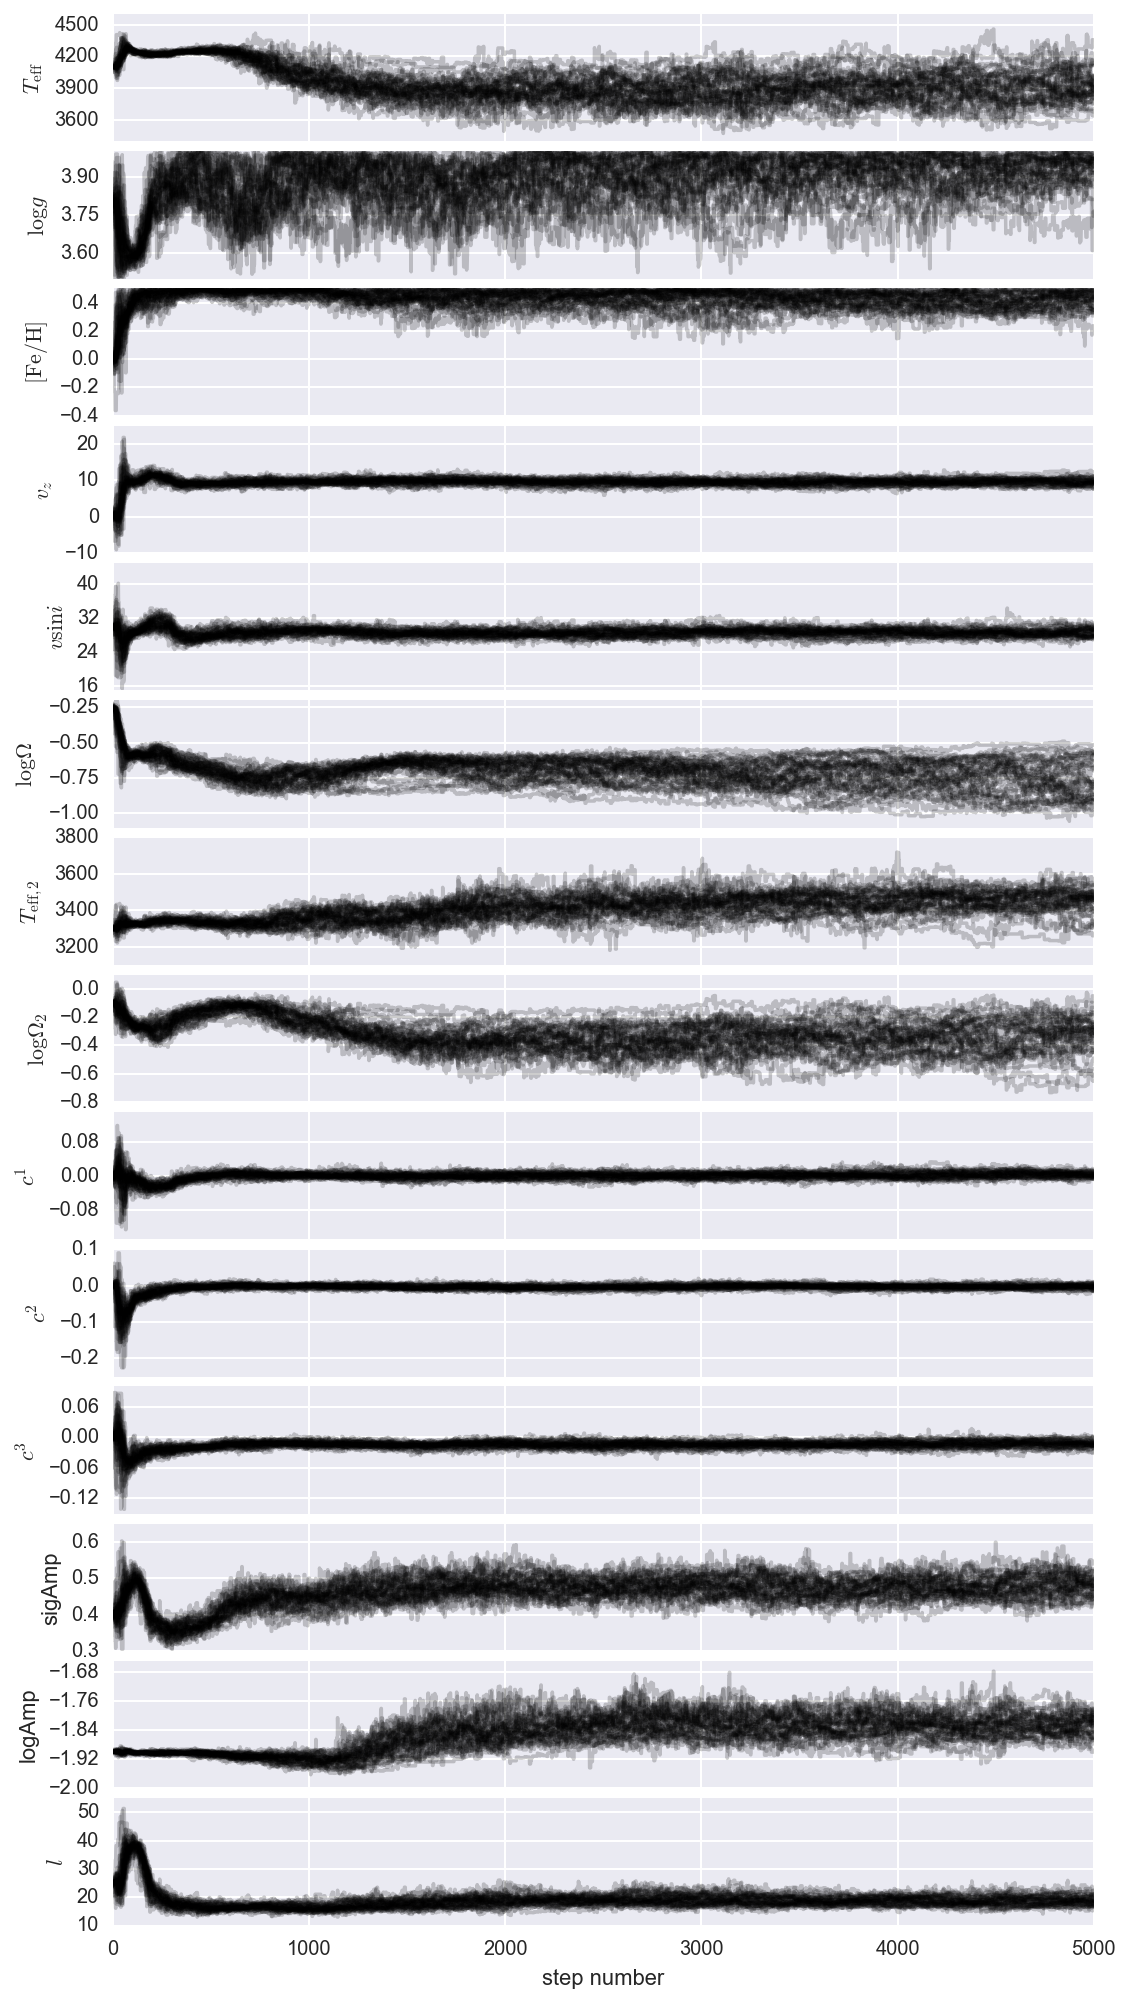

In [9]:
ws = np.load("../sf/m090/output/mix_emcee/run01/emcee_chain.npy")
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)

In [10]:
burned = ws[:, 4000:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [11]:
fc.shape

(40000, 14)

In [ ]:
import corner
fig = corner.corner(fc, labels=label)
fig.savefig('twelve_parameter_corner.png', dpi=300)

So cool, it looks like it's working, but it's displaying $\log{\Omega_2}$ instead of the fill factor.  Let's **compute** the fill factor, $b$, by:  
$ b = \frac{\Omega_2}{\Omega_1 + \Omega_2}$

In [ ]:
fc.shape

In [ ]:
bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )

The other parameter we care about is the temperature of the cool spot, $T_{\mathrm{eff,2}}$.

In [ ]:
tt = fc[:,6]

In [ ]:
sns.set_context('talk')

In [ ]:
sns.set_style('ticks')

In [ ]:
ax = sns.jointplot(bb, tt, kind='kde')
ax.ax_joint.set_ylabel('Star spot $T_{\mathrm{eff}}$')
ax.ax_joint.set_xlabel('Coverage fraction $f$')
plt.savefig('Star_spot_measurement.pdf', bbox_inches='tight')

# Over-plot many measurements from different orders.

In [ ]:
ws115 = np.load("../sf/m115/output/mix_emcee/run01/emcee_chain.npy")
ws114 = np.load("../sf/m114/output/mix_emcee/run01/emcee_chain.npy")
ws113 = np.load("../sf/m113/output/mix_emcee/run01/emcee_chain.npy")
ws112 = np.load("../sf/m112/output/mix_emcee/run01/emcee_chain.npy")

In [ ]:
b115 = ws115[:, 4000:,:]
xs, ys, zs = b115.shape
fc115 = b115.reshape(xs*ys, zs)

b114 = ws114[:, 4000:,:]
xs, ys, zs = b114.shape
fc114 = b114.reshape(xs*ys, zs)

b113 = ws113[:, 4000:,:]
xs, ys, zs = b113.shape
fc113 = b113.reshape(xs*ys, zs)

b112 = ws112[:, 4000:,:]
xs, ys, zs = b112.shape
fc112 = b112.reshape(xs*ys, zs)

In [ ]:
bb115 = 10**fc115[:,7] / ( 10**fc115[:,5] + 10**fc115[:,7] )
bb114 = 10**fc114[:,7] / ( 10**fc114[:,5] + 10**fc114[:,7] )
bb113 = 10**fc113[:,7] / ( 10**fc113[:,5] + 10**fc113[:,7] )
bb112 = 10**fc112[:,7] / ( 10**fc112[:,5] + 10**fc112[:,7] )

In [ ]:
ax = sns.jointplot(bb115, fc115[:,6], kind='kde')
ax.ax_joint.set_ylabel('Star spot $T_{\mathrm{eff}}$')
ax.ax_joint.set_xlabel('Coverage fraction $f$')
sns.kdeplot(bb114,  fc114[:,6], ax=ax.ax_joint)
sns.kdeplot(bb113,  fc113[:,6], ax=ax.ax_joint)
sns.kdeplot(bb112,  fc112[:,6], ax=ax.ax_joint)
plt.savefig('Star_spot_measurement.pdf', bbox_inches='tight')

Whaaat?  The estimates actually agree (sort of)??  My first reaction is that lower Teff2 starspot spectra just add more variance to the fit, since cooler star spectra have more wiggles...  I dunno though, could be "real"!

In [ ]:
sns.distplot(fc115[:,0], hist=False);
sns.distplot(fc114[:,0], hist=False);
sns.distplot(fc113[:,0], hist=False);
sns.distplot(fc112[:,0], hist=False);

In [ ]:
i=6
sns.distplot(fc115[:,i], hist=False);
sns.distplot(fc114[:,i], hist=False);
sns.distplot(fc113[:,i], hist=False);
sns.distplot(fc112[:,i], hist=False);

In [ ]:
sns.distplot(bb115, hist=False);
sns.distplot(bb114, hist=False);
sns.distplot(bb113, hist=False);
sns.distplot(bb112, hist=False);

In [ ]:
vals = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), 
           zip(*np.percentile(fc, [16, 50, 84], axis=0)))

In [ ]:
vs = list(vals)

In [ ]:
for lab, v in zip(label, vs):
    print("{}: {:.4f}".format(lab, v[0]))

## But what does the *range* of best fit spectra look like?

Ways to demonstrate:
    - Animation
    - Fill between color bands
    - Animation for one parameter variation at a time

The end.